In [ ]:
#pip install modin[Dask]

In [34]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [35]:
train = pd.read_csv("train_yaOffsB(1).csv")
data = train.copy(deep = True)

In [36]:
data.shape 

(88858, 10)

In [37]:
data.head(3).append(data.tail(3))

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [39]:
data['ID'].nunique() 

88858

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64


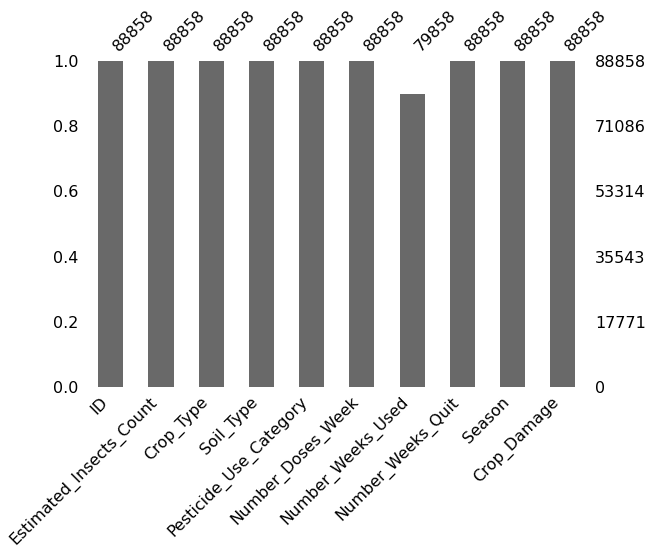

In [38]:
import missingno as msno
print(data.isnull().sum())

p = msno.bar(data, figsize = (9,6))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [41]:
data['Number_Weeks_Used'].fillna(method = 'ffill', inplace = True)

In [42]:
data['Number_Weeks_Used'] = data['Number_Weeks_Used'].astype('int64')

In [44]:
col = data.columns.tolist()
col.remove('ID')
data[col].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.600531,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.395172,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
95%,2999.000000,1.000000,1.000000,3.000000,60.000000,50.000000,29.000000,3.000000,1.000000
97%,3337.000000,1.000000,1.000000,3.000000,60.000000,53.000000,32.000000,3.000000,1.000000
99%,3702.000000,1.000000,1.000000,3.000000,70.000000,58.000000,37.000000,3.000000,2.000000


In [67]:
data[(data['Season'] == 1) & (data['Crop_Damage'] == 1) & (data['Soil_Type'] == 0)].head() 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
11,F00000023,1575,0,0,1,0,0,0,1,1
73,F00000140,488,0,0,3,10,17,0,1,1
74,F00000141,488,0,0,3,20,33,0,1,1
82,F00000156,531,0,0,3,20,34,0,1,1
120,F00000232,789,0,0,3,25,34,0,1,1


In [46]:
pd.DataFrame(data.groupby(['Crop_Damage','Crop_Type'])['Pesticide_Use_Category'].count())

Pesticide_Use_Category
Crop_Damage Crop_Type                        
0           0                           52778
            1                           21460
1           0                            9204
            1                            3103
2           0                            1607
            1                             706

In [47]:
pd.DataFrame(data.groupby(['Crop_Damage','Season','Crop_Type'])['Estimated_Insects_Count'].count())


Estimated_Insects_Count
Crop_Damage Season Crop_Type                         
0           1      0                            15996
                   1                             6497
            2      0                            26265
                   1                            10616
            3      0                            10517
                   1                             4347
1           1      0                             2801
                   1                              947
            2      0                             4572
                   1                             1543
            3      0                             1831
                   1                              613
2           1      0                              472
                   1                              189
            2      0                              827
                   1                              387
            3      0                              308
                   1                              130

In [52]:

df = pd.DataFrame( data[data['Crop_Damage'] == 1 ].mean(), columns = ['Values'])
df[ 'Variance'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].var())
df[ 'Standard deviation'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].std())
df[ 'Median'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].median())
df

,Values,Variance,Standard deviation,Median
Estimated_Insects_Count,1839.106200,853897.151974,924.065556,1678.0
Crop_Type,0.252133,0.188577,0.434255,0.0
Soil_Type,0.435037,0.245800,0.495782,0.0
Pesticide_Use_Category,2.416592,0.333100,0.577148,2.0
Number_Doses_Week,24.176079,212.001905,14.560285,20.0
Number_Weeks_Used,34.571951,196.937188,14.033431,36.0
Number_Weeks_Quit,7.630698,106.755121,10.332237,0.0
Season,1.894044,0.491942,0.701385,2.0
Crop_Damage,1.000000,0.000000,0.000000,1.0


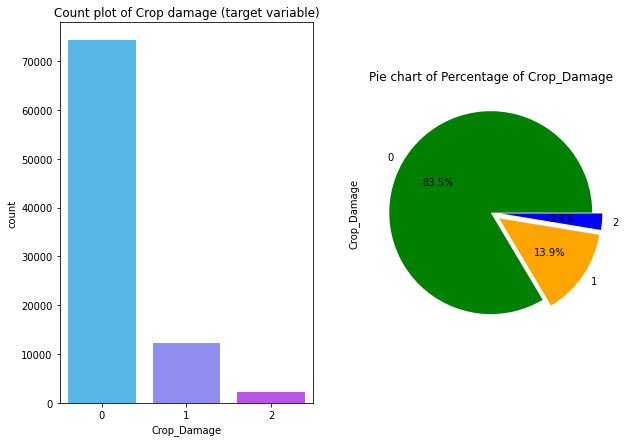

In [53]:
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Damage' , palette= 'cool', data= data) 
plt.title("Count plot of Crop damage (target variable)")

plt.subplot(1,2,2)
count = train['Crop_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'], figsize = (10,7),explode = [0,0.1,0.1],title = "Pie chart of Percentage of Crop_Damage")

Text(0.5, 1.0, 'Plot of crop damage Vs Crop type')

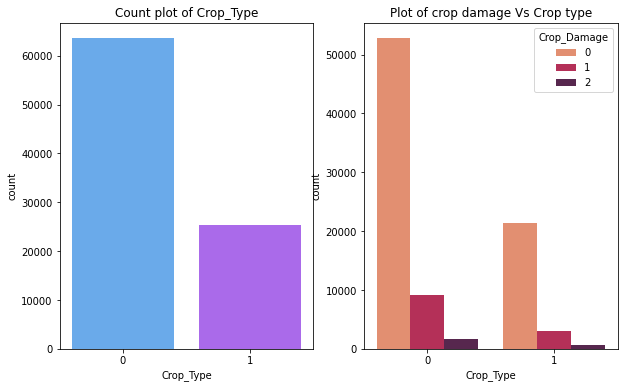

In [54]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Type' , palette= 'cool', data= data) 
plt.title("Count plot of Crop_Type")

plt.subplot(1,2,2)
sns.countplot(data['Crop_Type'], hue = data['Crop_Damage'],palette="rocket_r")
plt.title("Plot of crop damage Vs Crop type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d42d71358>,
      dtype=object)

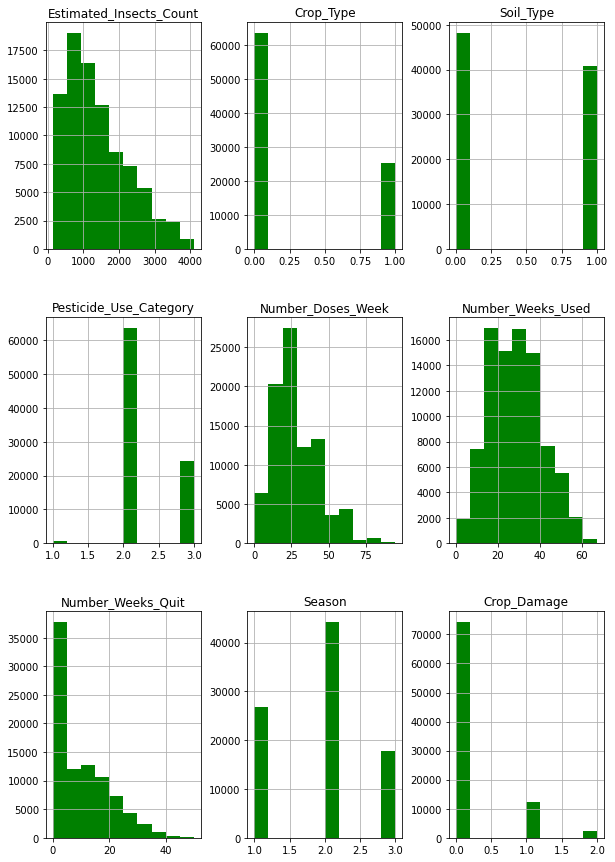

In [57]:
data[col].hist(figsize=(10,15),color = 'green')

Text(0.5, 1.0, 'Density plot of Estimated_Insects_Count')

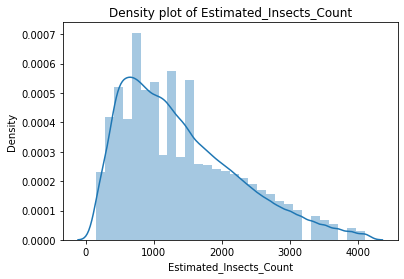

In [58]:
sns.distplot(data['Estimated_Insects_Count'], kde = True, hist = True, rug= False, bins= 30)
plt.title("Density plot of Estimated_Insects_Count")

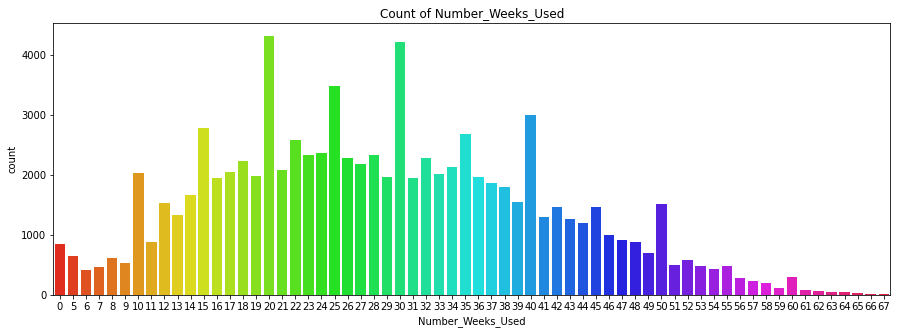

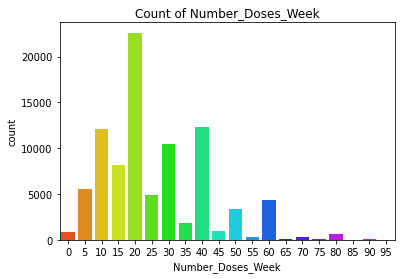

In [59]:

plt.figure(figsize = (15,5))
sns.countplot(data['Number_Weeks_Used'], palette = 'hsv')
plt.title('Count of Number_Weeks_Used')
plt.show() 
sns.countplot(data['Number_Doses_Week'], palette = 'hsv')
plt.title('Count of Number_Doses_Week')
plt.show() 

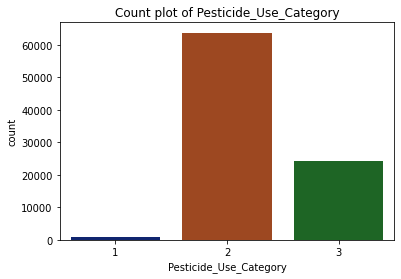

Text(0.5, 1.0, 'Box plot of Pesticide_Use_Category')

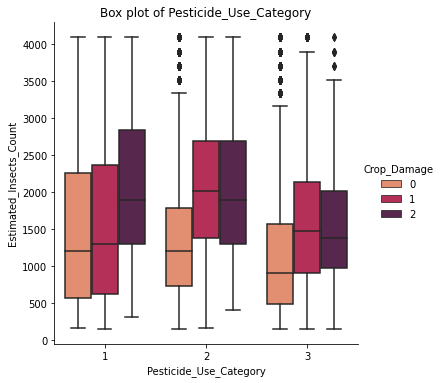

In [60]:

sns.countplot(data['Pesticide_Use_Category'], palette = 'dark')
plt.title("Count plot of Pesticide_Use_Category")
plt.show()
sns.catplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', kind = 'box', data = data, hue = 'Crop_Damage', palette= 'rocket_r')
plt.title("Box plot of Pesticide_Use_Category")


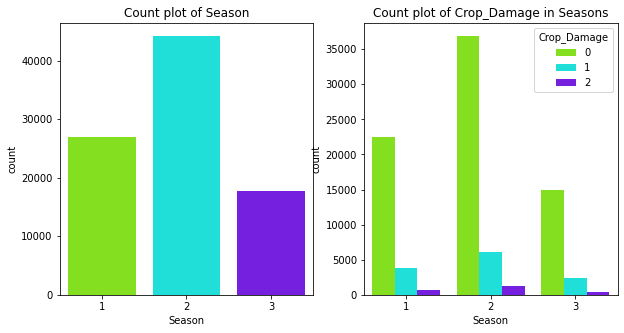

In [61]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(data['Season'], hue = data['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

Text(0.5, 1.0, 'Count plot of Crop_type in Seasons')

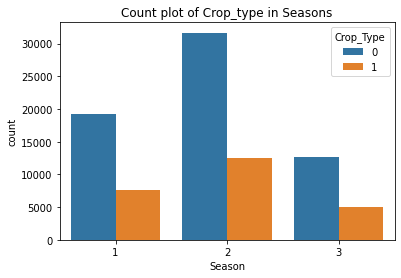

In [62]:

sns.countplot(data['Season'], hue = data['Crop_Type'])
plt.title('Count plot of Crop_type in Seasons')

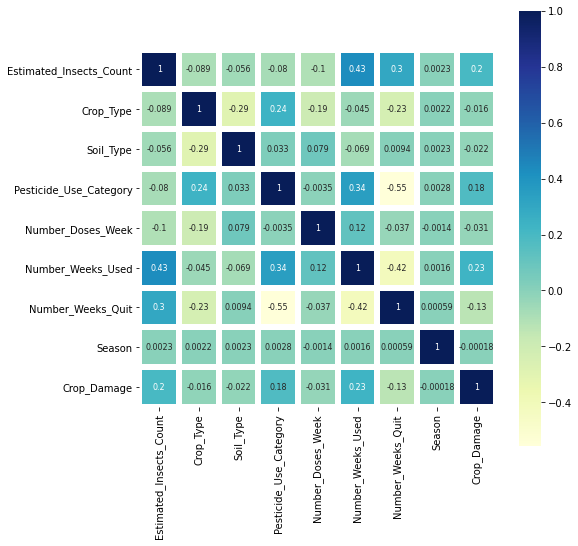

In [63]:
plt.figure(figsize = (8,8))
sns.heatmap(data[col].corr(), cmap = 'YlGnBu', square = True, annot = True, linewidths=5,annot_kws={'size': 8} )